# User Guide

1. **Getting Started**

   - Accessing the Catalog
   - User Registration
   - User Roles and Permissions

2. **Connecting to Pydap Server**:
   - Connect to the Pydap server: Use Python and Pydap to connect to the configured Pydap server, specifying the server's URL or endpoint.

3. **Browsing and Searching Data**

   - Navigating the Catalog
   - Advanced Search Options
   - Metadata Standards

4. **Data Access and Download**

   - Data Formats
   - Downloading Data
   - Data Citation and Attribution

4. **Querying Datasets**:
   - Query datasets: Use Pydap functions to query datasets for metadata, variables, dimensions, and other information.

5. **Data Subsetting and Manipulation**:
   - Subset data: Use Pydap's capabilities to subset and extract specific portions of datasets based on your needs.
   - Perform data manipulation: Apply operations to manipulate and process the retrieved data.


6. **Contributing Data**

   - Data Submission Guidelines
   - Metadata Entry
   - Quality Assurance

7. **Collaboration and Sharing**

   - Project and Group Workspaces
   - Data Sharing Options
   - Collaboration Tools

8. **Data Privacy and Security**

   - Data Access Policies
   - Data Security Measures
   - Compliance with Regulations

9. **Integration with Other Libraries**:
   - Integrate with other Python libraries: Explore how Pydap integrates with other scientific computing and data visualization libraries for extended functionality.

## Python `xarray` Tutorial

In [6]:
import xarray as xr

In [7]:
da = xr.open_dataset("http://134.94.199.14/nc/coads_climatology.nc", engine="pydap", decode_times=False, chunks=None)
da

<xarray.Dataset>
Dimensions:  (TIME: 12, COADSY: 90, COADSX: 180)
Coordinates:
  * COADSX   (COADSX) float64 21.0 23.0 25.0 27.0 ... 373.0 375.0 377.0 379.0
  * COADSY   (COADSY) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * TIME     (TIME) float64 366.0 1.096e+03 1.827e+03 ... 7.671e+03 8.401e+03
Data variables:
    SST      (TIME, COADSY, COADSX) float32 ...
    AIRT     (TIME, COADSY, COADSX) float32 ...
    UWND     (TIME, COADSY, COADSX) float32 ...
    VWND     (TIME, COADSY, COADSX) float32 ...
Attributes:
    history:  FERRET V4.30 (debug/no GUI) 15-Aug-96

If User Authentication is enabled for the catalog instance, then you will need to login to the server before you can access the data. You can do this by running the following code instead of the code above:

```python
import requests
import xarray as xr

session = requests.Session()
session.auth = ("username", "password")
da = xr.open_dataset("http://134.94.199.14/nc/coads_climatology.nc", engine="pydap", decode_times=False, chunks=None, session=session)
da
```

In [8]:
airt=da["AIRT"]
airt

<xarray.DataArray 'AIRT' (TIME: 12, COADSY: 90, COADSX: 180)>
[194400 values with dtype=float32]
Coordinates:
  * COADSX   (COADSX) float64 21.0 23.0 25.0 27.0 ... 373.0 375.0 377.0 379.0
  * COADSY   (COADSY) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * TIME     (TIME) float64 366.0 1.096e+03 1.827e+03 ... 7.671e+03 8.401e+03
Attributes:
    history:    From coads_climatology
    long_name:  AIR TEMPERATURE
    units:      DEG C

In [ ]:
airt.sel(COADSX="21.0", COADSY="-89.0", TIME="366.0", method="nearest")

In [9]:
airt=airt.astype('float32')

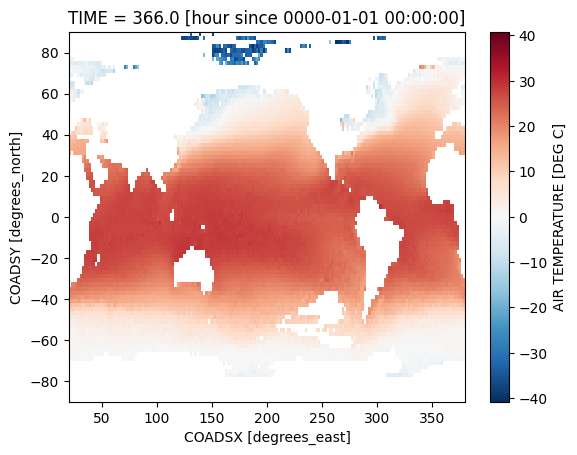

In [10]:
airt[0].airt()

In [12]:
sst = da["SST"]
sst

<xarray.DataArray 'SST' (TIME: 12, COADSY: 90, COADSX: 180)>
[194400 values with dtype=float32]
Coordinates:
  * COADSX   (COADSX) float64 21.0 23.0 25.0 27.0 ... 373.0 375.0 377.0 379.0
  * COADSY   (COADSY) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * TIME     (TIME) float64 366.0 1.096e+03 1.827e+03 ... 7.671e+03 8.401e+03
Attributes:
    history:    From coads_climatology
    long_name:  SEA SURFACE TEMPERATURE
    units:      Deg C

In [16]:
var= sst.sel(COADSX="21.0", COADSY="-89.0", TIME="366.0", method="nearest")
var

<xarray.DataArray 'SST' ()>
[1 values with dtype=float32]
Coordinates:
    COADSX   float64 21.0
    COADSY   float64 -89.0
    TIME     float64 366.0
Attributes:
    history:    From coads_climatology
    long_name:  SEA SURFACE TEMPERATURE
    units:      Deg C

In [17]:
sst=sst.astype('float32')

In [19]:
sst[0].plot()